In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
with open('properties.json') as p:
    properties_json = json.load(p)
properties_df = pd.json_normalize(properties_json)
properties_df.shape

(17776, 9)

In [3]:
with open('mgmt.json') as m:
    mgmt_json = json.load(m)
mgmt_df = pd.json_normalize(mgmt_json)
mgmt_df.shape

(17767, 4)

In [7]:
display(mgmt_df.head(5))


,mgmt.mgmtID,mgmt.name,mgmt.market,mgmt.state
0,27918,Essex Property Trust AKA Essex Apartment Homes,San Francisco,CA
1,24736,Privately Owned and Managed,San Francisco,CA
2,29079,East Bay Asian Local Development Corp. (EBALDC),San Francisco,CA
3,28444,VPM Management Inc.,San Francisco,CA
4,28177,The John Stewart Company,San Francisco,CA


In [25]:
print (mgmt_df.value_counts("mgmt.name").shape)
mgmt_df.value_counts("mgmt.name")

(1782,)


mgmt.name
Privately Owned and Managed    2504
Greystar                        589
FPI Management                  297
Lincoln Property Company        260
Alliance Residential            221
                               ... 
NE Management                     1
NFI Management                    1
NL Johnson Management Inc         1
Calton Properties                 1
163rd Avenue Investors LLC        1
Length: 1782, dtype: int64

In [11]:
management_ID_groups = mgmt_df.groupby("mgmt.mgmtID")
management_IDs = management_ID_groups.first()
management_IDs["mgmt.count"] = management_ID_groups.size()
print(management_IDs.size)
management_IDs.sort_values("mgmt.count", ascending= False).head(5)

7116


,mgmt.name,mgmt.market,mgmt.state,mgmt.count
mgmt.mgmtID,,,,
24736,Privately Owned and Managed,San Francisco,CA,2504
24136,Greystar,San Francisco,CA,589
26831,FPI Management,San Francisco,CA,297
25089,Lincoln Property Company,Los Angeles,CA,260
24984,Alliance Residential,San Francisco,CA,221


In [15]:
management_market_groups = mgmt_df.groupby(["mgmt.mgmtID", "mgmt.market", "mgmt.state"])
management_markets = management_market_groups.first()
management_markets["mgmt.count"] = management_market_groups.size()
print(management_markets.size)
management_markets.sort_values(["mgmt.count"], ascending= False).head(20)

6978


mgmt.name  \
mgmt.mgmtID mgmt.market   mgmt.state                                                      
24736       Los Angeles   CA                                Privately Owned and Managed   
            San Diego     CA                                Privately Owned and Managed   
            San Francisco CA                                Privately Owned and Managed   
            Houston       TX                                Privately Owned and Managed   
            DFW           TX                                Privately Owned and Managed   
            Sacramento    CA                                Privately Owned and Managed   
            Orange County CA                                Privately Owned and Managed   
            Inland Empire CA                                Privately Owned and Managed   
25089       DFW           TX                                   Lincoln Property Company   
24136       Houston       TX                                                   Greystar   
24736       Atlanta       GA                                Privately Owned and Managed   
28129       Orange County CA                       Irvine Company Apartment Communities   
26831       Sacramento    CA                                             FPI Management   
            San Francisco CA                                             FPI Management   
27305       Orange County CA          Western National Property Management AKA Weste...   
24136       DFW           TX                                                   Greystar   
27918       San Francisco CA             Essex Property Trust AKA Essex Apartment Homes   
24088       DFW           TX                                     Wehner Multifamily LLC   
24136       San Francisco CA                                                   Greystar   
24736       San Antonio   TX                                Privately Owned and Managed   

                                      mgmt.count  
mgmt.mgmtID mgmt.market   mgmt.state              
24736       Los Angeles   CA                 465  
            San Diego     CA                 317  
            San Francisco CA                 285  
            Houston       TX                 275  
            DFW           TX                 226  
            Sacramento    CA                 194  
            Orange County CA                 191  
            Inland Empire CA                 141  
25089       DFW           TX                 135  
24136       Houston       TX                 130  
24736       Atlanta       GA                 121  
28129       Orange County CA                  97  
26831       Sacramento    CA                  94  
            San Francisco CA                  93  
27305       Orange County CA                  87  
24136       DFW           TX                  87  
27918       San Francisco CA                  80  
24088       DFW           TX                  79  
24136       San Francisco CA                  69  
24736       San Antonio   TX                  66

In [19]:
mgmt_filtered = mgmt_df[mgmt_df["mgmt.name"] != "Privately Owned and Managed"]
mgmt_filtered.shape

(15263, 4)

In [20]:
mgmt_filtered = mgmt_filtered.drop_duplicates(["mgmt.mgmtID", "mgmt.market", "mgmt.state"])
mgmt_filtered.shape

(3455, 4)

In [28]:
display(properties_df.head(5))
properties_df.shape

,property.propertyID,property.name,property.formerName,property.streetAddress,property.city,property.market,property.state,property.lat,property.lng
0,85630,Curry Junction,,3549 Curry Lane,Abilene,Abilene,TX,32.405355,-99.773680
1,85631,Riatta Ranch,,1111 Musken,Abilene,Abilene,TX,32.453461,-99.704162
2,85633,Timber Ridge,,3602 Rolling Green Drive,Abilene,Abilene,TX,32.400155,-99.769077
3,85678,Indian Run,,3500 Cedar Run,Abilene,Abilene,TX,32.403342,-99.774376
4,85680,Warwick,,2400 Arrowhead,Abilene,Abilene,TX,32.394751,-99.751140


(17776, 9)

In [35]:
print (properties_df.value_counts("property.propertyID").shape)
properties_df.value_counts("property.propertyID").head(5)

(17776,)


property.propertyID
70034     1
120132    1
120143    1
120140    1
120139    1
dtype: int64

In [33]:
print (properties_df.value_counts("property.name").shape)
properties_df.value_counts("property.name").head(5)

(15410,)


property.name
Las Palmas       16
Park Place       13
Country Club     12
Parkside         12
Village Green    12
dtype: int64

In [36]:
properties_df.value_counts(['property.name','property.streetAddress', "property.city",	"property.market",	"property.state", 'property.lat','property.lng']).head(20)

property.name                                 property.streetAddress         property.city     property.market  property.state  property.lat  property.lng
Monterey Village                              10244 Arrow Route              Rancho Cucamonga  Inland Empire    CA              34.099400     -117.581400     2
Lumen Grant Park                              465 Memorial Drive             Atlanta           Atlanta          GA              33.746090     -84.372110      2
Idyll Willow                                  28032 Marguerite Pkwy          Mission Viejo     Orange County    CA              33.555050     -117.668700     2
Eagle Glen                                    38245 Murrieta Hot Springs Rd  Murrieta          Inland Empire    CA              33.554630     -117.141200     2
Lido Palms                                    100 Tennessee St               Redlands          Inland Empire    CA              34.052920     -117.199400     2
Villas at Towngate                           

In [37]:
properties_filtered = properties_df.drop_duplicates(['property.name','property.streetAddress', "property.city",	"property.market",	"property.state", 'property.lat','property.lng'])
properties_filtered.shape

(17763, 9)

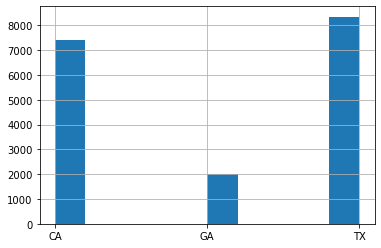

In [40]:
mgmt_df["mgmt.state"].hist()

In [39]:
mgmt_df.value_counts("mgmt.state")

mgmt.state
TX    8342
CA    7419
GA    2006
dtype: int64

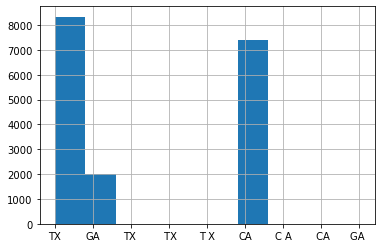

In [43]:
properties_df["property.state"].hist()

In [41]:
properties_df.value_counts("property.state")

property.state
TX     8338
CA     7418
GA     2007
TX        5
 CA       3
C A       2
 TX       1
GA        1
T X       1
dtype: int64

In [ ]:
properties_df.groupby(['property.name','property.streetAddress']).agg(['count'])


In [ ]:
properties_df.value_counts(['property.lat','property.lng'])

In [ ]:
pd.set_option("display.max_rows", None)